# Problem1
The company gets a project which consists of several tasks (project is a list and each task is of
type string). Each task should be implemented by a specific team, depending on its contents.
The teams are the following: Data Science, Design and QA. Your program should use a chain
of responsibility design pattern. If the given task contains any of the words analyze, research or
model - it should be handled by the Data Science team, if the task contains the words color or
decoration - it should be handled by the Design team, if it contains the word test - it should be
handled by the QA team. You should also have a default handler which will handle the tasks that
don’t fall under the 3 categories.
Sample input is a list similar to this: [‘a model to separate the background’, ‘test the application’,
etc.]
Make sure to test your code with some input.

Ընկերությունը ստանում է առաջադրանքներից բաղկացած պրոյեկտ (պրոեկտ-ը իրենից
ներկայացնում է list և յուրաքանչյուր առաջադրանք string տիպի արժեք է)։ Ամեն
առաջադրանքը պետք է կատարվի համապատասխան թմի կողմից՝ կախված
առաջադրանքի պարունակությունից։ Թմերը հետևյալն են՝ Data Science, Design և QA։
Ձեր ծրագիրը պետք է օգտագործի chain of responsibility design pattern-ը։ Եթե
առաջադրանքը պարունակում է analyze, research կամ model բառերից որևէ մեկը՝ այն
պետք է կատարվի Data Science թմի կողմից։ Եթե առաջադրանքը պարունակում է color
կամ decoration բառերից որևէ մեկը՝ այն պետք է կատարվի Design թմի կողմից։ Եթե
առաջադրանքը պարունակում է test բառը՝ այն պետք է կատարվի QA թմի կողմից։ Պետք
է նաև ունենաք default handler, որը որևէ ձևով handle կանի բոլոր առաջադրանքները,
որոնք չեն համապատասխանում տրված երեք թմերին։
Ծրագրի input-ի օրինակ՝ [‘a model to separate the background’, ‘test the application’, etc.]
Անպայման թեստավորեք ծրագիրը որոշակի input-ով։

In [1]:
class Team:    

    def __init__(self):  
        self.next_team = None

    def do_task(self, task):  
        done = self.implement(task)
    
        if not done:
            self.next_team.do_task(task)
  
    def implement(self, task):  
        
        raise NotImplementedError('It is not implemented at this level yet.')
        
        
class Intern(Team):
    # This is the default handler :)
    
    def implement(self, task):
        print(f'Intern: {task}')

        return True
        
class DataScience(Team):
    
    def implement(self, task):
        if any(word in task for word in ['analyze', 'research', 'model']):
            print(f'DataScience Team: {task}')

            return True
        

class Design(Team):
    
    def implement(self, task):
        if any(word in task for word in ['color', 'decoration']):
            print(f'Design Team: {task}')

            return True
        
        
class QA(Team):
    
    def implement(self, task):
        if any(word in task for word in ['test']):
            print(f'QA Team: {task}')

            return True
        
        
class Company:
  
    def __init__(self):
        
        qa = QA()
        design = Design()
        intern = Intern()
        data_science = DataScience()

        qa.next_team = intern
        design.next_team = qa
        data_science.next_team = design
    
        self.team = data_science

    def do_project(self, project):
        
        for task in project.tasks:
            self.team.do_task(task)        

class Project:
    
    def __init__(self, tasks):
        self.tasks = tasks
        
tasks = [
    'a model to separate the background',
    'test the application',
    'change the color of the logo',
    'find some unicorns'
    ]

unicorn_project = Project(tasks)

YerevaNN = Company()
YerevaNN.do_project(unicorn_project)

DataScience Team: a model to separate the background
QA Team: test the application
Design Team: change the color of the logo
Intern: find some unicorns


# Problem 2
Let’s go back to Christmas time. We will decorate christmas trees using a decorator design
pattern. You should have a ChristmasTree class, the main purpose of which is to print “This is a
christmas tree {christmas tree id}. I am decorated with: ”, the christmas tree id should be given
in the class constructor. You should also have a TreeDecorator class and 3 different specific
decorators: ChristmasStar (which should add a string “star” at the end of the output of the
ChristmasTree), Garland (which should add a string “garland” at the end of the output of the
ChristmasTree) and Lights (which should add a string “lights” at the end of the output of the
ChristmasTree). You can add any additional functionality.
Make sure to test your code with some input.

Զարդարելու ենք տոնածառ՝ գործածելով decorator design pattern-ը։ Պետք է ունենաք
ChristmasTree class, որի հիմնական գործողությունը կլինի տպել “This is a christmas tree
{christmas tree id}։ I am decorated with: ”, christmas tree id-ն պետք է փոխանցվի class
constructor-ով։ Նաև պետք է ունենաք TreeDecorator class, երեք տարբեր կոնկրետ
decorator class-ներով՝ ChristmasStar (որն ավելացնում է “star” string-ը ChristmasTree-ի
output-ի վերջում), Garland (որն ավելացնում է “garland” string-ը ChristmasTree-ի output-ի
վերջում) և Lights (որն ավելացնում է “lights” string-ը ChristmasTree-ի output-ի վերջում)։
Կարող եք ավելացնել ցանկացած լրացուցիչ ֆունկցիոնալ։
Անպայման թեստավորեք ծրագիրը որոշակի input-ով։

In [2]:
import math
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


def plot(star=False, garland=False, lights=False):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection="3d")

    k=300
    Z = [i for i in range(k)]
    X = [math.cos(i/5)*(k-i) for i in range(k)]
    Y = [math.sin(i/5)*(k-i) for i in range(k)]
    ax.scatter(X,Y,Z, c="green", marker="^")
    
    if star:
        ax.scatter(0,0,310, c='yellow', marker='*', s=500)
    
    if garland:
        step = 3
        c = [(i/k,abs(0.5-i/k),i/k) for i in range(1,k,step)]
        Z = [i for i in range(1,k,step)]
        X = [math.cos(i/5+2)*(k-i+10) for i in range(1,k,step)]
        Y = [math.sin(i/5+2)*(k-i+10) for i in range(1,k,step)]
        ax.scatter(X,Y,Z, c=c, marker="o",s=40)
        
    if lights:
        step = 3
        Z = [i for i in range(1,k,step)]
        X = [math.cos(i/5+1)*(k-i+10) for i in range(1,k,step)]
        Y = [math.sin(i/5+1)*(k-i+10) for i in range(1,k,step)]
        ax.scatter(X,Y,Z, c='red', marker="o",s=20)
        
    plt.xlim(-500,500)
    plt.ylim(-500,500)
    return fig,

This is a christmas tree 8d8ef402-fbfd-4bf0-ac5a-33860a68253d. I am decorated with: christmas star, lights, 


<IPython.core.display.Javascript object>


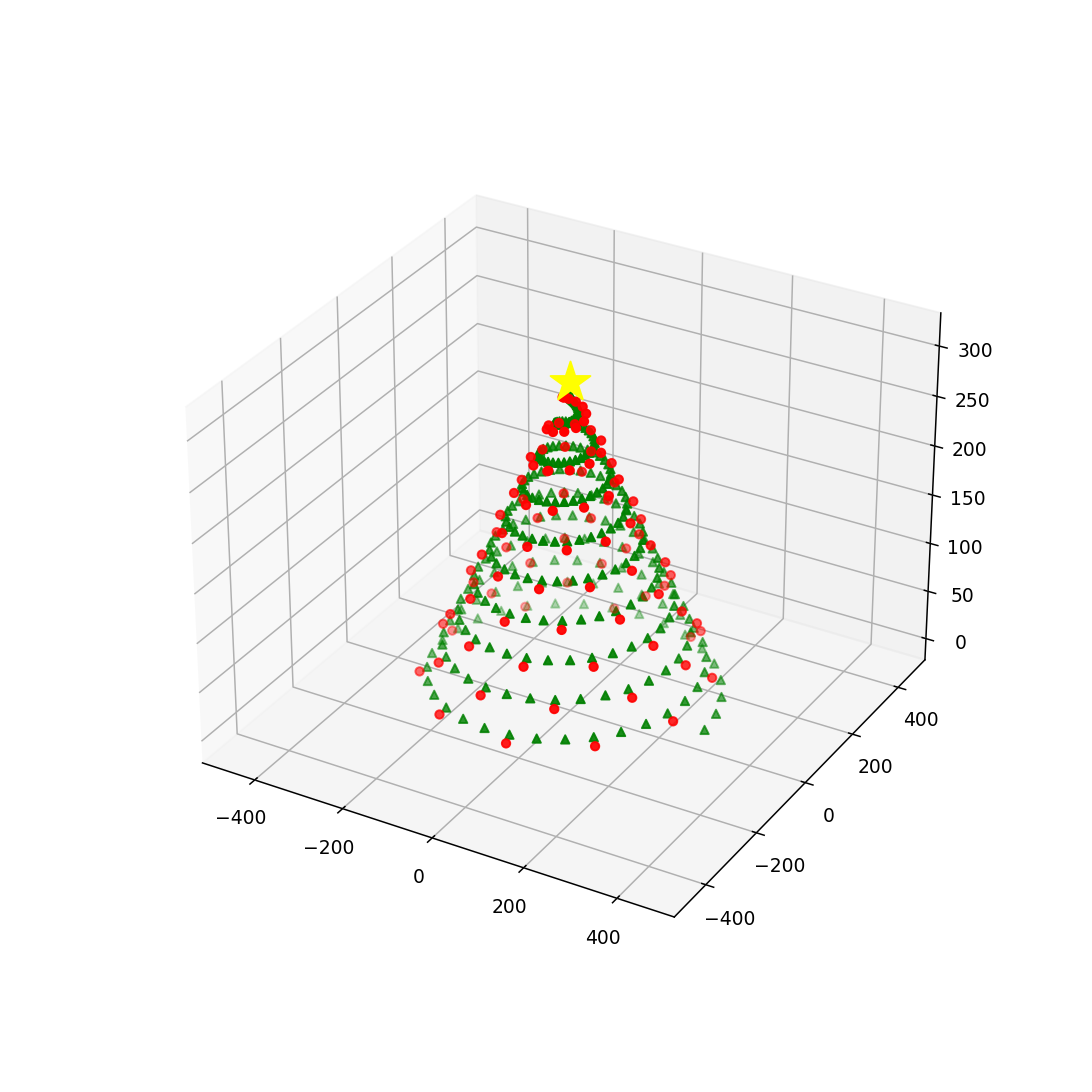

This is a christmas tree 8d8ef402-fbfd-4bf0-ac5a-33860a68253d. I am decorated with: christmas star, lights, garland, 


<IPython.core.display.Javascript object>


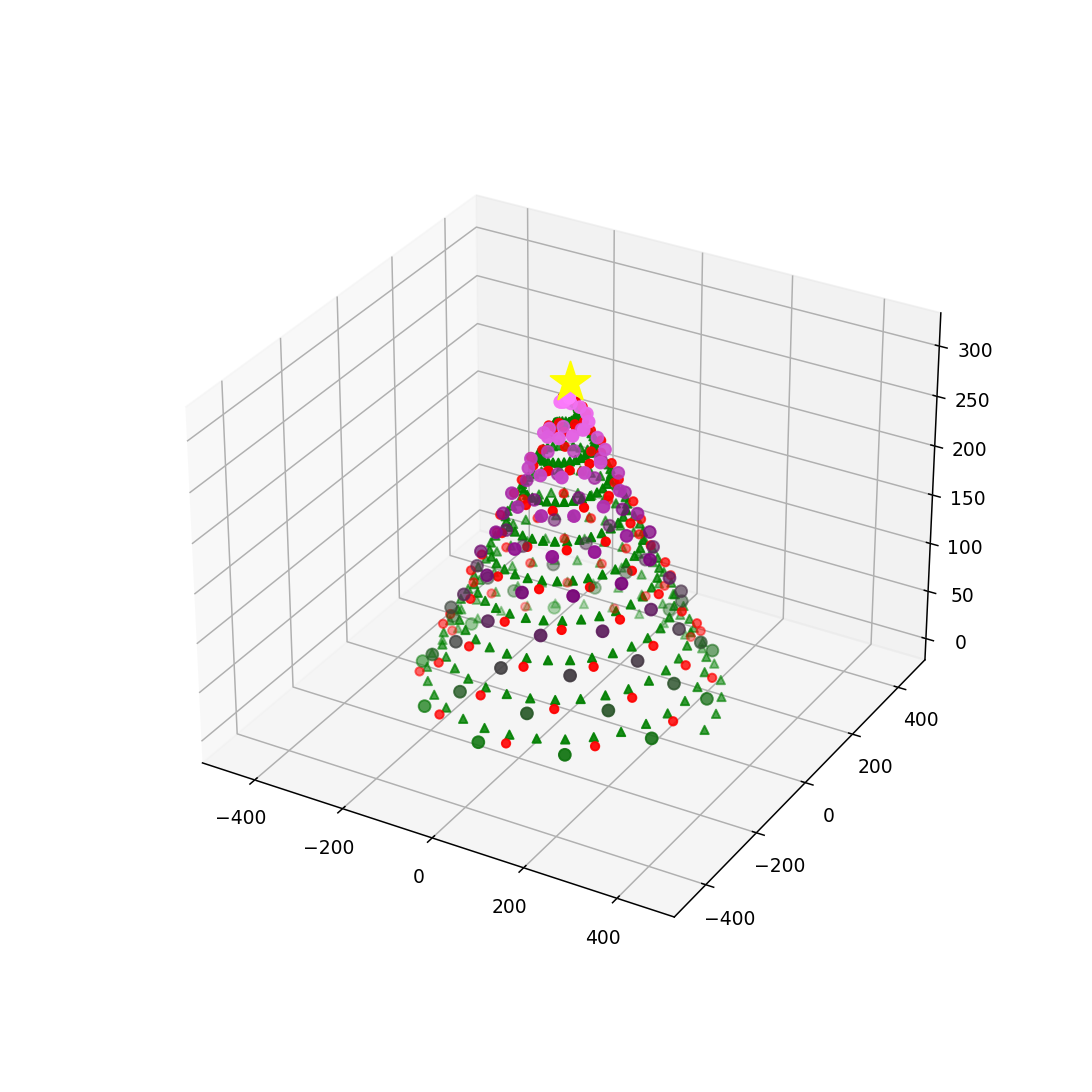

This is a christmas tree 31754a04-e1be-470f-aa69-c8a7ab551cca. I am decorated with: lights, 


<IPython.core.display.Javascript object>


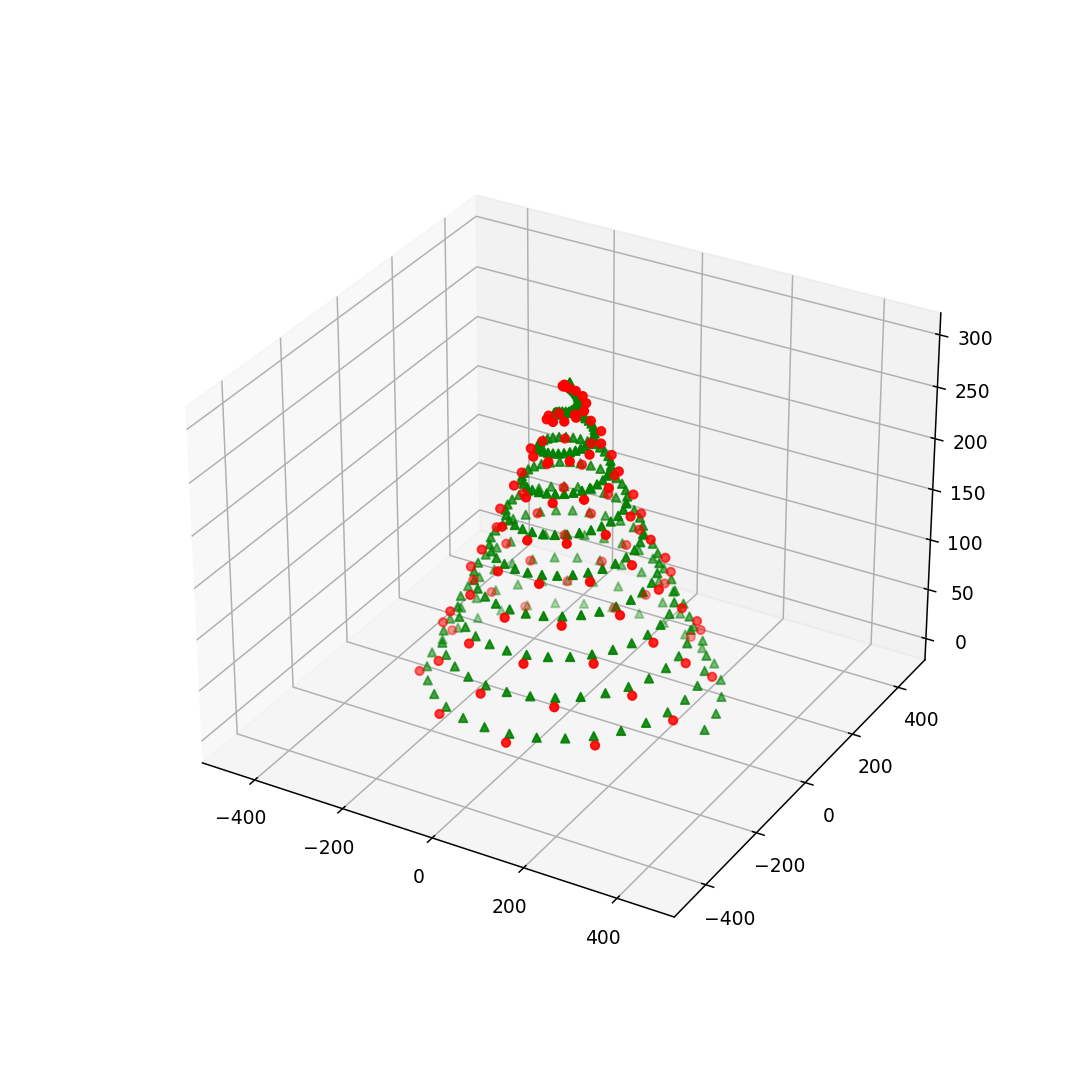

In [3]:
import uuid


class TreeDecorator:

    def decorate(self):
        pass


class ChristmasStar(TreeDecorator):

    def decorate(self):
        return 'christmas star'


class Garland(TreeDecorator):
  
    def decorate(self):
        return 'garland'
    
    
class Lights(TreeDecorator):
  
    def decorate(self):
        return 'lights'
    
class ChristmasTree:
  
    def __init__(self,):
        self.id = str(uuid.uuid4())
        self.decorations = ''
        self.star = False
        self.garland = False
        self.lights = False
        

    def decorate(self, decorations):
        
        print_info = f'This is a christmas tree {self.id}. I am decorated with: '
        
        for decoration in decorations:
            
            if decoration == 'christmas star':
                decorator = ChristmasStar()
                self.star = True
            elif decoration == 'garland':
                decorator = Garland()
                self.garland = True
            elif decoration == 'lights':
                decorator = Lights()
                self.lights = True
            
            self.decorations += decorator.decorate() + ', '

        print(print_info+self.decorations)
        anim = plot(star=self.star, garland=self.garland, lights=self.lights)
            

tree1 = ChristmasTree()
tree1.decorate(['christmas star', 'lights'])
tree1.decorate(['garland'])

tree2 = ChristmasTree()
tree2.decorate(['lights'])